In [ ]:
#objective: Predict seminal quality of an individual

In [42]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [43]:
#load data
df = pd.read_csv('../datasets/fertility_Diagnosis.txt', sep=",", header=None)
df.columns = ['Season','Age','Child_disease','accident','surgical_int','high_fever',
              'frequency_alochol','smoking_habit','num_hours','output']

In [44]:
df.head()

,Season,Age,Child_disease,accident,surgical_int,high_fever,frequency_alochol,smoking_habit,num_hours,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [5]:
df.shape

(100, 10)

In [20]:
df.describe()

,Season,Age,Child_disease,accident,surgical_int,high_fever,frequency_alochol,smoking_habit,num_hours,output
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800,1.0
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395,0.0
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000,1.0
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000,1.0
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000,1.0
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [45]:
#recode class
cleanup_nums = {"output":{"O":0, "N":1}}
df.replace(cleanup_nums, inplace=True)

In [46]:
#normalize data using standard scalar
scaler = preprocessing.StandardScaler()
to_scale_df = df[['Age', 'frequency_alochol', 'num_hours']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['Age', 'frequency_alochol', 'num_hours'])

In [47]:
#one hot encode data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le_season = LabelEncoder()

df['Season_encoded'] = le_season.fit_transform(df.Season)

season_ohe = OneHotEncoder()
X = season_ohe.fit_transform(df.Season_encoded.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Season_"+str(int(i)) for i in range(X.shape[1])])

#df = pd.concat([df, dfOneHot], axis=1)
#alternative
#from sklearn.preprocessing import LabelBinarizer
#color_lb = LabelBinarizer()
#make_lb = LabelBinarizer()
#X = color_lb.fit_transform(df.color.values)
#Xm = make_lb.fit_transform(df.make.values)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
dfOneHot.head()

,Season_0,Season_1,Season_2,Season_3
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [48]:
#remaining data
df_other = df[['Child_disease','accident','surgical_int','high_fever','smoking_habit']]

In [49]:
#combine data
df_new = pd.concat([dfOneHot,df_other ,df['output']], axis=1)

In [50]:
df_new.head()

,Season_0,Season_1,Season_2,Season_3,Child_disease,accident,surgical_int,high_fever,smoking_habit,output
0,0.0,1.0,0.0,0.0,0,1,1,0,0,1
1,0.0,1.0,0.0,0.0,1,0,1,0,1,0
2,0.0,1.0,0.0,0.0,1,0,0,0,-1,1
3,0.0,1.0,0.0,0.0,0,1,1,0,-1,1
4,0.0,1.0,0.0,0.0,1,1,0,0,-1,0


In [51]:
df_new.dtypes
df.shape

(100, 11)

In [57]:
#split data into train and test
X = df_new.drop('output', axis=1)
y = df_new['output']
y=y.astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

KNN: 0.880000 (0.116619)
CART: 0.720000 (0.146969)
SVM: 0.880000 (0.116619)
RF: 0.820000 (0.116619)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

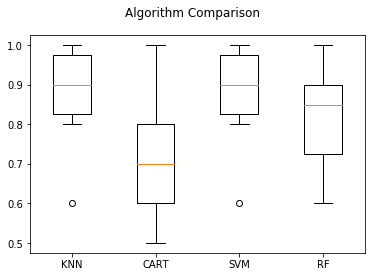

In [58]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#perform classification
array = df_new.values
X = array[:,0:9]
Y = array[:,9]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [63]:
#perform on test data
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.84

In [62]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["O", "N"],
    index=["O", "N"]
)

,O,N
O,0,4
N,0,21
